In [5]:
import csv
import matplotlib.pyplot as plt
import numpy as np



In [17]:


def plot_time_by_m(data):
      # consider just the iterative method (method column = "i"), with N = 10000, and the approach=3
      # plot the time (totalDuration(ms)) vs the number of threads (M)
      # get the data for the iterative method
      data_ = [row for row in data if row["method"] == "i" and row["N"] == "10000" and row["approach"] == "3"]
      # get the number of threads (M) and the time (totalDuration(ms))
      m_values = [int(row["M"]) for row in data_]
      time_values = [float(row["totalTime"]) for row in data_]
      plt.plot(m_values, time_values)
      plt.xlabel("Number of Threads (M)")
      plt.ylabel("Total Duration (ms)")
      plt.title("Total Duration by Number of Threads")
      plt.show()




def plot_duration_by_m(data):
  m_values = []
  duration_means = []
  # Sort data by M value (assuming M is an integer)
  data.sort(key=lambda row: int(row["M"]))
  for row in data:
    m = int(row["M"])
    m_values.append(m)
    durations = [float(d["totalTime"]) for d in data if int(d["M"]) == m]
    duration_means.append(sum(durations) / len(durations))

  # Calculate trend line using numpy.polyfit
  m, b = np.polyfit(m_values, duration_means, 1)  # Linear fit (degree=1)
  trend_line = [m * x + b for x in m_values]  # Generate trend line points
  plt.xticks(m_values)  # Set x-axis ticks to all unique M values (integers)
  plt.plot(m_values, duration_means, marker='o', label='Average Duration')  # Plot data points as circles
  plt.plot(m_values, trend_line, '--', label='Trend Line')  # Plot trend line
  plt.xlabel("Number of Threads (M)")
  plt.ylabel("Average Total Duration (ms)")
  plt.title("Average Total Duration by Number of Threads")
  plt.grid(True)
  plt.legend()  # Add legend for clarity
  plt.tight_layout()
  plt.show()


def plot_primes_by_N(data):
  n_values = []
  primes_means = []
  for n in set(row["N"] for row in data):
    n_values.append(n)
    primes = [int(row["numPrime"]) for row in data if row["N"] == n]
    primes_means.append(sum(primes) / len(primes))
    
  n_values, primes_means = zip(*sorted(zip(n_values, primes_means)))

  plt.plot(n_values, primes_means, marker='o')
  plt.xlabel("Number of Elements (N)")
  plt.ylabel("Average Number of Primes")
  plt.title("Average Number of Primes by Number of Elements")
  plt.show()

# Read data from CSV file
# data = []
# with open("results.csv", newline='') as csvfile:
#   reader = csv.DictReader(csvfile)
#   for row in reader:
#     # Skip the empty column (assuming it's always the last one)
#     clean_row = {key: value for key, value in row.items() if key != ''}
#     data.append(clean_row)

# plot_duration_by_m(data.copy())
# plot_time_by_m(data.copy())
# plot_primes_by_N(data.copy())

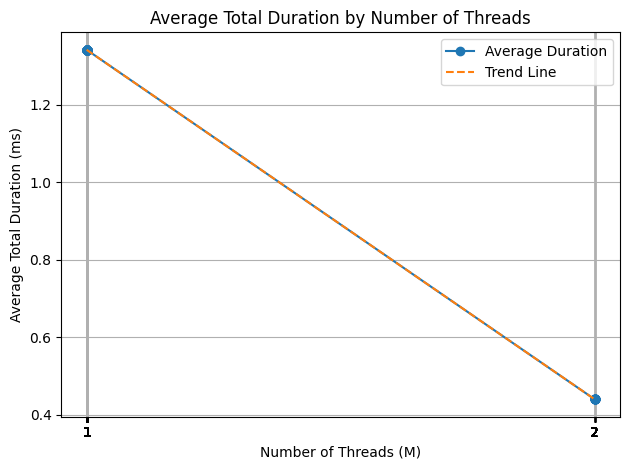

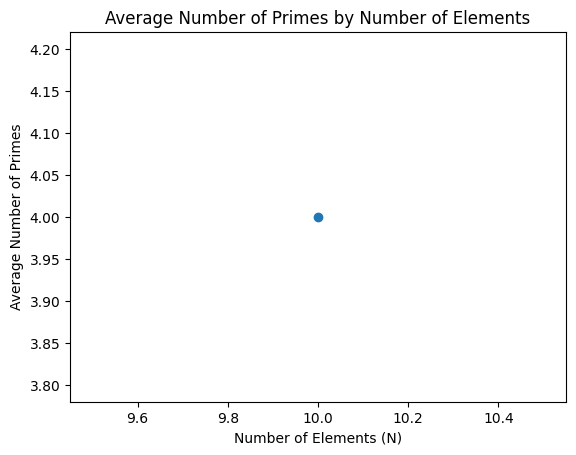

In [18]:
import csv

# Headers for the CSV file
headers = ["N", "M", "approach", "method", "numPrime", "totalTime", "timePerThread"]

# Read data from CSV file
data = []
with open("results.csv", newline='') as csvfile:
  reader = csv.reader(csvfile)  # Use csv.reader for plain reading without headers
  header = next(reader)  # Skip the header row (which doesn't exist here)
  for row in reader:
    # Parse the values, handling the list in the last column
    parsed_row = [int(row[0]), int(row[1]), int(row[2]), row[3], int(row[4]), float(row[5])]
    thread_durations = row[6].strip("[]").split(";")
    parsed_row.append([float(duration) for duration in thread_durations])

    # Create a dictionary with headers as keys
    data_dict = dict(zip(headers, parsed_row))
    data.append(data_dict)
plot_duration_by_m(data.copy())
plot_primes_by_N(data.copy())

In [92]:
data

[{'1': '1', 'r': 'r', '0.1878': '52.8523', '[0.000200]': '0.000400'},
 {'1': '1', 'r': 'r', '0.1878': '0.2505', '[0.000200]': '0.000100'},
 {'1': '1', 'r': 'r', '0.1878': '0.211', '[0.000200]': '0.000200'},
 {'1': '1', 'r': 'r', '0.1878': '0.2337', '[0.000200]': '0.000300'},
 {'1': '1', 'r': 'r', '0.1878': '0.2297', '[0.000200]': '0.000100'},
 {'1': '1', 'r': 'r', '0.1878': '1.4146', '[0.000200]': '0.000200'},
 {'1': '1', 'r': 'r', '0.1878': '0.2654', '[0.000200]': '0.000200'},
 {'1': '1', 'r': 'r', '0.1878': '0.2445', '[0.000200]': '0.000100'},
 {'1': '1', 'r': 'r', '0.1878': '0.2532', '[0.000200]': '0.000500'},
 {'1': '2', 'r': 'r', '0.1878': '0.2386', '[0.000200]': '0.000100'},
 {'1': '2', 'r': 'r', '0.1878': '0.2064', '[0.000200]': '0.000200'},
 {'1': '2', 'r': 'r', '0.1878': '0.343', '[0.000200]': '0.000400'},
 {'1': '2', 'r': 'r', '0.1878': '0.5094', '[0.000200]': '0.000200'},
 {'1': '2', 'r': 'r', '0.1878': '0.2276', '[0.000200]': '0.000200'},
 {'1': '2', 'r': 'r', '0.1878': '0.

In [ ]:
plot_duration_by_m(data.copy())